# Ch 4 - Inferential Statistics

# Group 'Date'
# Balaji, BraHYaw, Gilbert


In class you learnt about how to infer parameters of, and draw conclusions about a population using a statistic (number/property describing a characteristic of a sample). 
Further, there were examples of wine-data which provided information about:
* Understanding sampling distributions
* Method 1: Point estimates
* Method 2: Confidence intervals
* Method 3: Hypothesis testing

In this lab session, we will look into the following
* Exercise importing function for files of .txt, .xlsx, .csv 
* Demostration of Central Limit Theorem.
* Confidence Intervals. 
* t-distributions and stats packages. 

In some point, we will make use of random numbers as data and/or wine-data. 

## Lab Setup

In [63]:
import pandas as pd
import numpy as np
rng_seed = 42
import seaborn as sns
from scipy import stats 
from scipy.stats import norm
import zipfile
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [64]:
# set up random number generator 
rng = np.random.default_rng(rng_seed)

## Examples 

### Importing datafiles



#### Importing Excel files
For importing the files as with multiple sheet in excel workbook, in Python 3.0, could use `pd.read_excel()`.

For example, if workbook.xlsx has sheets 'Sheet1' and 'Sheet2', then use `pd.read_excel('workbook.xlsx', 'Sheet1')` or  `('workbook.xlsx', 'Sheet2')`. 

### System information 

If you ever need to check which version of Python or what version of a module you are working with you can use something similar to the following code. 

In [65]:
# Get to know your system versions
# import sys  # already imported above
print('Python version:', sys.version, '\n')
print('Pandas version:', np.__version__ , '\n')
print('Seaborn version: ', sns.__version__, '\n')

Python version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)] 

Pandas version: 1.21.5 

Seaborn version:  0.11.2 



In [66]:
# Load wine data 
url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" 
wine = pd.read_csv(url, sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [67]:
wine.shape

(1599, 12)

# Inferential Statistics

The piece of code below is adapted from `nb.week3.ipynb` class material. A sample of size 5 is selected and the mean is calculated.  This is repeated 1000 times, collecting the sample means. 
A histogram function is invoked for sampled means. 

Observe the distribution of the mean samples - is it normal, uniform, gamma, beta ..... ?

mean pH, mu = 3.311113195747343


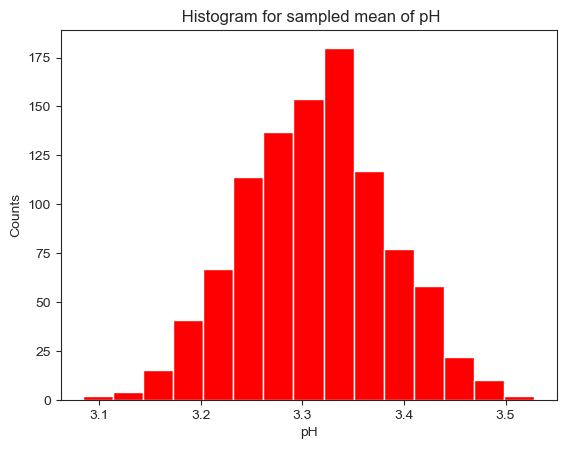

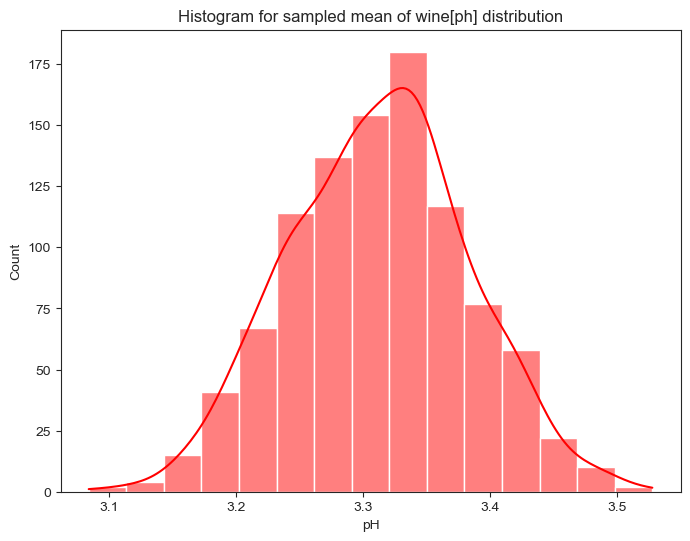

In [68]:
'''The piece of code from nb.week3.ipynb is provided, use it to  
compute the mean for the 'n' random samples and store in array, means[i]
This is repeated 'N_tests' times. '''

mu = wine["pH"].mean()                                # Mean of population
print("mean pH, mu = " + str(mu))

N_tests = 1000                                        # Num of test to perform
n = 5                                                 # number of samples
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    
# Histogram in Matplotlib    
nbins = 15
_ = plt.hist(means, nbins, color= 'red' )
plt.title(' Histogram for sampled mean of pH')
plt.xlabel('pH')
plt.ylabel('Counts')

# Histogram in seaborn
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='red', kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')

plt.show()

### Central Limit Theorem

From Chap 4, we had a chance to look into Central Limit Theorem. The initial population distribution was not observed in the class and the mean sampled distribution, i.e., mean of `wine['pH']`, evidently displayed normal distribution (see the plots above).

<!-- BEGIN QUESTION -->

## Exercise 1

Check what was the distribution of the initial population ? Create the  Histogram and read the discussion below.

https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

In [69]:
wp=wine['pH']
print(wp)


0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64


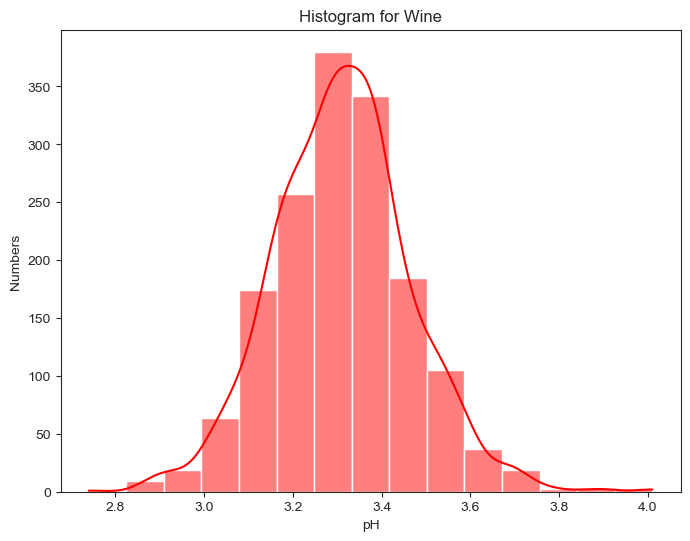

In [70]:
# Plot the distribution of the population itself i.e., wine['pH']. 
#  Use seaborn rather than matplotlib to create the histogram

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(wp, bins=nbins, color ='red', kde=True)
plt.title('Histogram for Wine')
plt.xlabel('pH')
plt.ylabel('Numbers')
plt.show()

<!-- END QUESTION -->

Since, the population distribution was also normal distribution plot. We might expect that the sampled mean could be normal distribution. What if we try with different population distribution using random generator available in python library and observe the profile. Does it agree with Central Limit Theorem?

For options regarding random numbers generation in certain distribution pattern, see the link:  
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

*Think about:* What if the initial population is other than normal distribution. Would CLT come into picture? 


## Exercise 2 - Uniform distribution

In Exercise 1, the distribution of wine pH values is approximately normal.  What about if this data follows another distribution?  How does it affect the distribution of the sampled means?

Let's look if the initial data came from a Uniform distribution.

In [71]:
# Create a pandas DataSeries - created using random numbers 
#  Sample 1000 numbers from the uniform distribution - unif(0,1) 
#  Hint: look at np.random.uniform() function, using the random number generator
#   seeded above:  rng.uniform()

s = pd.Series(rng.uniform(0,1,1000))
s.head()



0    0.033878
1    0.683015
2    0.950496
3    0.829150
4    0.277198
dtype: float64

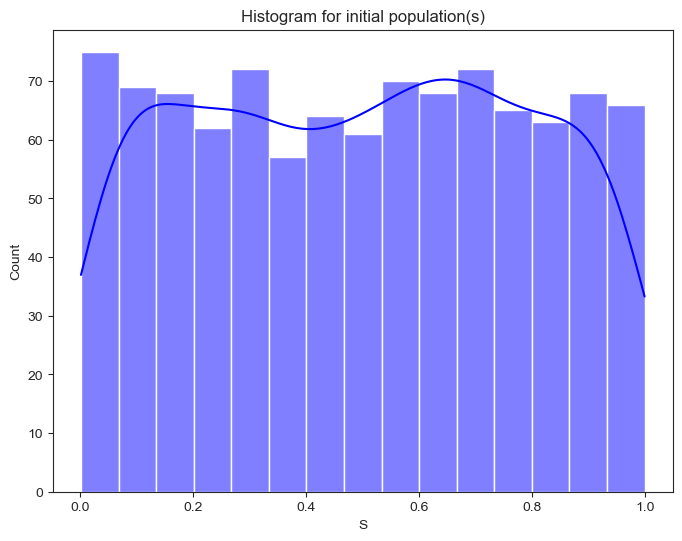

In [72]:
# Plot a histogram for the initial population, stored in 's'
#  Use seaborn for the plot 

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(s, bins=nbins, color ='b', kde=True)
plt.title('Histogram for initial population(s)')
plt.xlabel('S')

plt.show()

mean s, mu = 0.49634094825557884


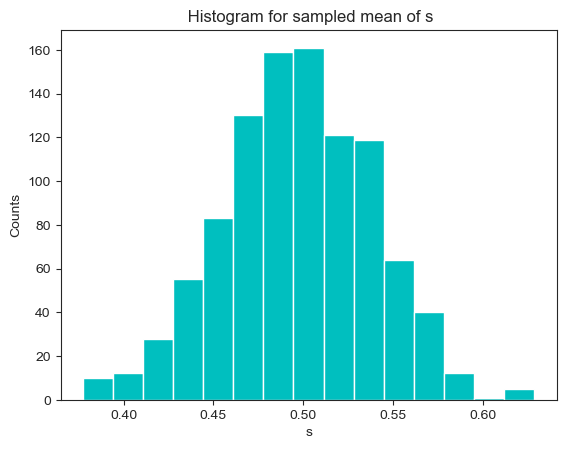

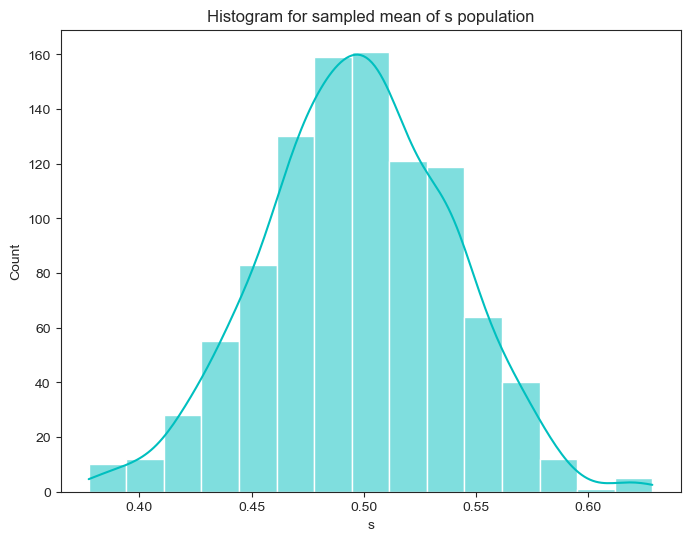

In [73]:
# In this cell, collection of 'n' random samples 'N-test' times 
#  storing the mean of each collection in the array.  
# Then, create a histogram of the sampled means. 

# As a start I have copied the most of the code for where this was done for wine-pH.  
# Modify it to get the sample means of the uniformly distributed sample population.

mu = s.mean()
print("mean s, mu = " + str(mu))

N_tests = 1000
n = 50 
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop.mean()
    
    
nbins = 15
plt.hist(means, nbins, color= 'c')
plt.title(' Histogram for sampled mean of s')
plt.xlabel('s')
plt.ylabel('Counts')
# Create a histogram of the sampled means from the uniform distribution

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='c', kde=True)
plt.title('Histogram for sampled mean of s population')
plt.xlabel('s')

plt.show()

<!-- END QUESTION -->

#####  Once the code is up and running. Examine the following for better understanding. 
 * How is plot sensitive for 'n' - no of samples drawn from population?
 An increase in n samples 
 * How does the profile change when 'N_test' - is increased or decreased?

<!-- BEGIN QUESTION -->

## Exercise 3 - Gamma distributions

Let's examine this again if the initial data is from a Gamma distributions. 

Will the Central Limit Theorem agree here as well? 

Read through Chapter 4 for more information.  

mean s, mu =>  1.9793825895217714


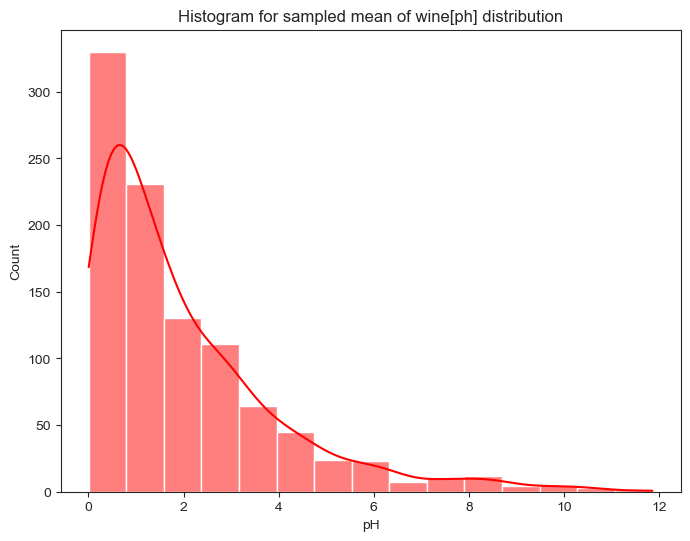

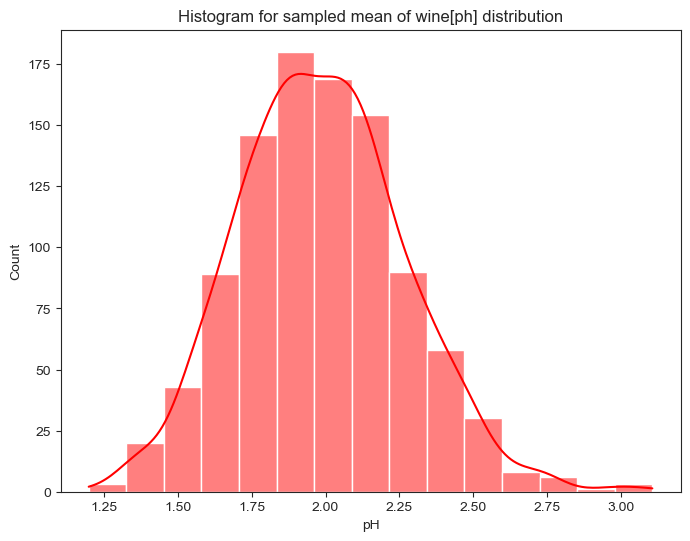

In [96]:

# Perform the similar operation as above but on a different distribution, e.g., gamma. 
# Refer to the link  provided earlier to generate the initial samples. 
# Continue to use seaborn for plotting.


# To try Gamma distribution function - np.random.gamma
#   with the random number generator - rng.gamma
s = pd.Series(rng.gamma(1,2,1000))
s_df = pd.DataFrame(s,columns=["pH"])

# Histogram plot of initial population
mu = s.mean();
print("mean s, mu => ", mu)

N_tests = 1000
n = 50
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s_df.index.values,n)
    sampled_gamma_data = s_df.loc[observations]
    means[i] = sampled_gamma_data["pH"].mean()

    # Histogram in seaborn
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(s_df["pH"], bins=nbins, color ='red', kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')

# Histogram of sampled means 
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='red', kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')

plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 4 - Wald distributions

Let's examine this again if the initial data is from a Wald distributions. 

Will the Central Limit Theorem agree here as well? "

Read through Chapter 4 for more information.

mean of random dataset, mu = 0.987633961985448


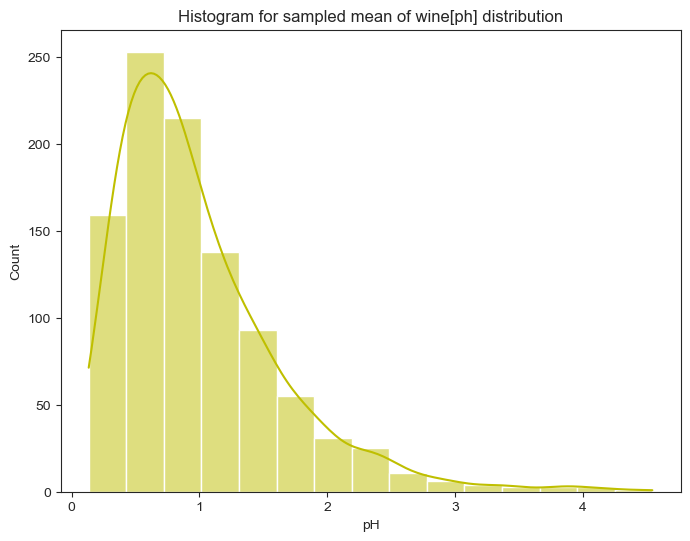

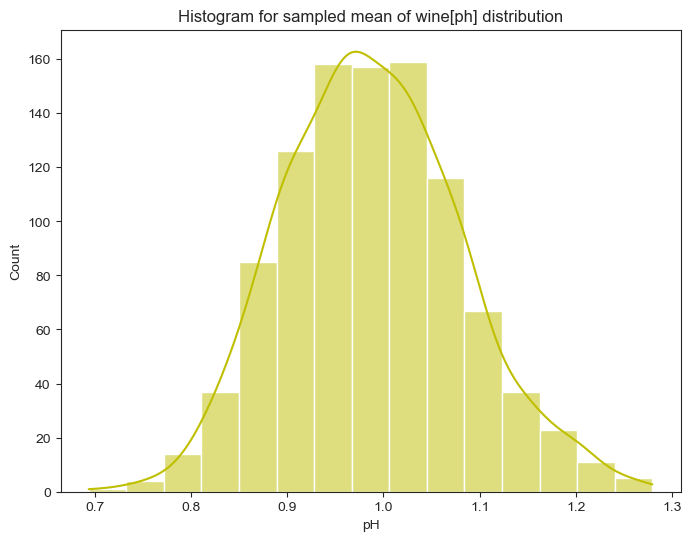

In [100]:

# Perform the similar operation as above but on a different distribution, e.g., wald. 
# Refer to the link  provided earlier to generate the initial samples. 
# Continue to use seaborn for plotting.


# To try Wald distribution function - np.random.wald
#  use the random number generator - rng.wald 
s = pd.Series( rng.wald(1,2,1000))
sdf=pd.DataFrame(s,columns=['pH'])


# Histogram plot of initial population



mu = s.mean();
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(sdf.index.values,n)
    sampled_gamma_data = sdf.loc[observations]
    means[i] = sampled_gamma_data["pH"].mean()

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(sdf["pH"], bins=nbins, color ='y', kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')

# Histogram of sampled means 
 
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='y', kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')

plt.show()


<!-- END QUESTION -->

## Measuring Variability of Estimates

Since, both the uniform and other distribution in population resulted in the normal (Gaussian) distribution type in the sampled mean. Now, Method-1 (point estimates) and Method 2 (Confidence Interval) can be applied.  



<!-- BEGIN QUESTION -->

## Exercise 5 - Confidence Intervals

Refer to section 4.3.1 and 4.3.2 in the textbook and from `nb.week3` notebook. Explain in words (in the below Markdown cell), what is a Confidence Interval ? What does it mean 95% C.I ? 

**ANSWER HERE:**
* The confidence interval can be regarded as a feasible range of values for the sample parameter.
* 95% Confidence interval means that 95% of the confidence intervals are likely to contain the true mean of the population. We are 95% confident that the interval contains the mean of the population. 

<!-- END QUESTION -->

### Example - Confidence Intervals

Spend some time reviewing https://docs.scipy.org/doc/scipy/reference/stats.html


* Below piece of code is replicated from `nb.week3`. Have a look into the calculation of Confidence Intervals. What happens when confidence level is changed? to 90% --> 95% --> 99% --> 99.9 %.

* Check with different no of samples. 
* Check what happens if the no. of N-test is increased. 

Read: 4.3.2 in textbook

We are 99.0 % confident that the interval,
   [2.9313405776295287, 3.740659422370471] contains the mean.


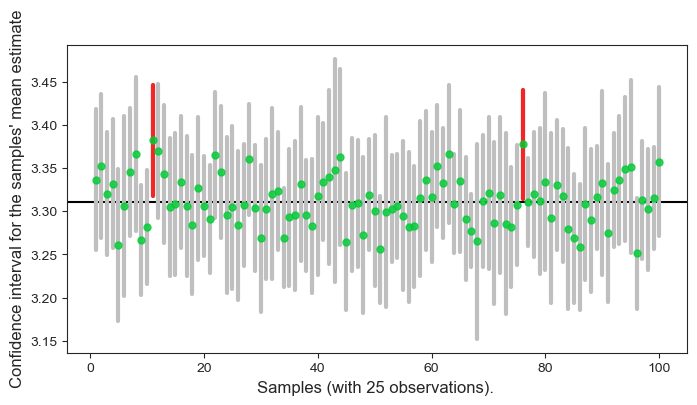

In [101]:
''' observe the output plot while changing the Confidence level, 
no of samples and no of times the test is performed '''

# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.01

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 25

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

<!-- BEGIN QUESTION -->

## Exercise 6

Now assume that only the good quality wines are distilled at one of the wineries. It is known they contain pH greater than and equal to 3.5. The sampled mean by a quality inspector was 3.56 for a batch of 15 such wines. What is the 95% CI for mean? 
 

In [120]:


# We are interested in only a wines which have pH greater than 3.5. 
# This becomes our population  of interest

n = 15
alpha = 0.05

# Sample Mean
Xbar = 3.56

# Filtering data for higher quality wines with pH >= 3.5 
highquality = sampled_wines[sampled_wines['pH']>=3.5]
sigma = highquality['pH'].std()


observations = np.random.choice(highquality.index.values, 15)
sampled_observations = highquality.loc[observations]

mu = sampled_observations['pH'].mean()
sigma = sampled_observations['pH'].std()
print('The mean is :', mu, '& the Std deviation is:', sigma)


# standard error computation
se = sigma/np.sqrt(n)
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
CI = [Xbar - se*z_alphadiv2,Xbar + se*z_alphadiv2 ]

print('We are', round(100*confidence,3), "% confident that the interval")
print("   ", CI , "contains the mean.")


The mean is : 3.5646666666666667 & the Std deviation is: 0.07347173087722406
We are 95.0 % confident that the interval
    [3.5228188573177857, 3.5971811426822144] contains the mean.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 7

Using `stats.norm.interval()`, CI can be computed.  Use this function to compute the 95% CI for mean of 3.56 (batch of 15)

In [111]:


CIs = stats.norm.interval(0.95,Xbar, sigma)
print('We are', round(100*confidence,3), "% confident that the interval")
print('   ', CIs , "contains the mean.")
       

We are 95.0 % confident that the interval
    (3.418109539599565, 3.7018904604004352) contains the mean.


<!-- END QUESTION -->

### Example - t distribution


If number of samples are low, it is better to use the t distribution.

Recall, the exercise from `nb.week3`.  An engineer working for Ford is interested in the population of all vehicles that have an engine size of 3.0L or larger, and is particular interested in $\mu$, the highway mileage (mpg). Assume the population is normally distributed. The sample mean among a random sample of 14 vehicles is 18.3 mpg, and the sample standard deviation is 5.1 mpg (note: $\sigma$ is unknown). What is the 95% CI for $\mu$?

In [112]:
from scipy.stats import t
alpha = 0.05
xbar = 18.3
n = 14
dof = n-1
se = 5.1/np.sqrt(n)
t_alphadiv2 = t.ppf(1-alpha/2,dof)
confidence = t.cdf (t_alphadiv2,dof)-t.cdf(-t_alphadiv2, dof)
ci = [xbar - se*t_alphadiv2, xbar + se*t_alphadiv2]


print('we are', round(100*(1-alpha), 3), '%', "confident that the interval")
print('   ',  ci , "contains the mean.")



we are 95.0 % confident that the interval
    [15.355347668416327, 21.244652331583676] contains the mean.


## Exercise 8 

We can make a function out of the above code and/or can invoke Stats package from SciPy for the same. Recommended is to get use to stats package - `scipy.stats.t()`

Apply `stats.t.interval()` function here to obatin the 95% CI, the sigma for this is known to be around 5.1. `xbar` is 18.3. The degrees of freedom are same as above n-1. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [114]:
# Use scipy.stats  
from scipy.stats import t
CIt = stats.t.interval(0.95,14,18.3,5.1)
print('we are', round(100*(1-alpha), 3), '%', "confident that the interval")
print("   ", CIt , "contains the mean.")

we are 95.0 % confident that the interval
    (7.361587891623673, 29.23841210837633) contains the mean.


### Example 

Calculate the standard error using `scipy.stats.sem()`

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

Standard error is computed by \begin{align}
S.E = \frac{\sigma}{\sqrt{n}}
\end{align}



In [115]:
from scipy import stats
alpha = 0.05
sigma = sampled_observations['pH'].std()
n = 15
se = sigma/np.sqrt(n)
sef =  stats.sem(sampled_observations['pH'])
print('S.E from sigma and n is: ', se)
print(' and S.E from stats is also: ', sef)

S.E from sigma and n is:  0.01869215946317668
 and S.E from stats is also:  0.01869215946317668


## Exercise 9 

Now you have worked on `stats.normal.interval` and `stats.t.interval` to compute the CI. Try to solve the questions below.

 The random daily quality check at packaging unit yielded sigma of 2.0 for a samples of 150 observations and the mean was 3.7. Find the 90% confidence interval for of the mean.

In [121]:
# compute the S.E (standard Error) using the formula explained earlier. 
alpha = 0.1
sigma =2.0
n = 150
se = sigma/np.sqrt(n)
sef =  stats.sem(sampled_observations['pH'])
print('S.E from sigma and n is: ', se)
print(' and S.E from stats is also: ', sef)

# Use the most appropriate function: norm.interval or t.interval 
alpha = 0.1
CIs = stats.norm.interval(0.9,3.7,2.0)
#CIs = stats.t.interval(0.9,149,3.7,2.0)

print('we are', round(100*(1-alpha), 3), "% confident that the interval")
print("   ", CIs , "contains the mean.")

S.E from sigma and n is:  0.16329931618554522
 and S.E from stats is also:  0.018970319340301467
we are 90.0 % confident that the interval
    (0.41029274609705446, 6.989707253902944) contains the mean.


### Extra Exercises 

Now, if you have time, try to implement what you have learnt in this session to the avacado dataset, we had extracted from zipfile.

1. What is the distribution of average price in the dataset?
2. Distribution of sampled price?
3. CI for a case. 

In [131]:
ov=pd.read_csv('C:/Users/gilbe/Downloads/avocado.csv',sep=',')
ov

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [138]:
mu=ov['AveragePrice'].mean()
mu

1.4059784097758825

In [132]:
ovap=ov['AveragePrice']
ovap

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

mean ovprice, ovu = 1.4059784097758825


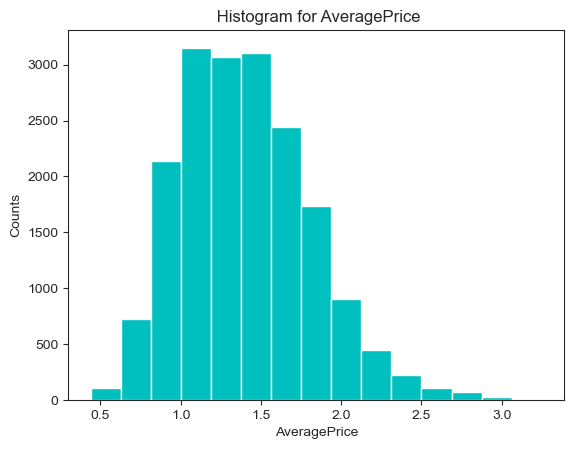

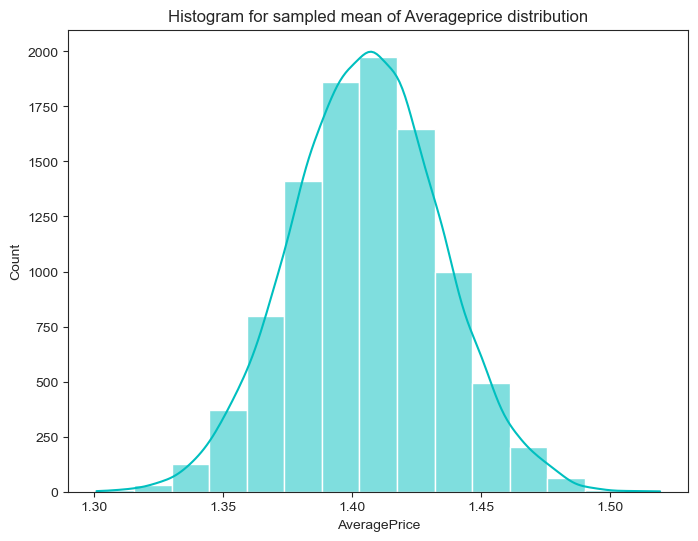

In [150]:
ovu = ov['AveragePrice'].mean()                                # Mean of population
print("mean ovprice, ovu = " + str(ovu))

N_tests = 10000                                       # Num of test to perform
n = 200                                                 # number of samples
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(ov.index.values,n)
    sampled_ov = ov.loc[observations]
    means[i] = sampled_ov["AveragePrice"].mean()
    
# Histogram in Matplotlib    
nbins = 15
_ = plt.hist(ovap, nbins, color= 'c' )
plt.title(' Histogram for AveragePrice')
plt.xlabel('AveragePrice')
plt.ylabel('Counts')

# Histogram in seaborn
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='c', kde=True)
plt.title('Histogram for sampled mean of Averageprice distribution')
plt.xlabel('AveragePrice')

plt.show()

We are 95.0 % confident that the interval,
   [0.6312607407322649, 2.191139259267735] contains the mean.


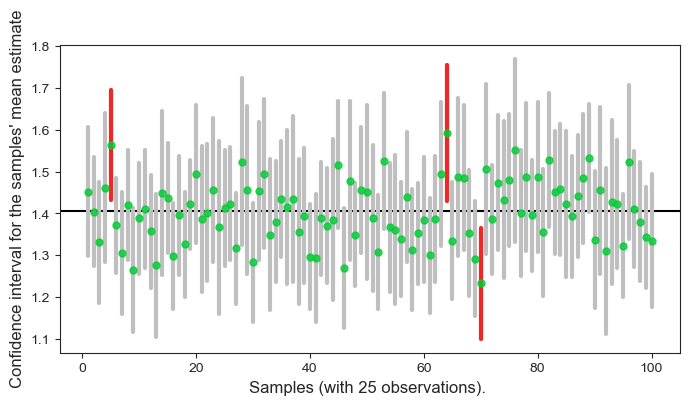

In [152]:
# some sampled mean. Note, not mean of population
xbar = sampled_ov["AveragePrice"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_ov["AveragePrice"].std() 


alpha = 0.05

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 25

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
ovu = ov["AveragePrice"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(ov.index.values,n)
    sampled_ov = ov.loc[observations]
    means[i] = sampled_ov["AveragePrice"].mean()
    sigma[i] = sampled_ov["AveragePrice"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()